In [1]:
# change this to the right path if you use a different path
# or specify the ORCA_PATH environmental variable
import os
import sys
if os.getenv("ORCA_PATH"):
    ORCA_PATH = os.getenv("ORCA_PATH")
else:
    ORCA_PATH = "../orca"
sys.path.append(ORCA_PATH)

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
import orca_predict 
orca_predict.load_resources(models=['1M','32M'],use_cuda=True)
from orca_predict import *

In <PYTHONPATH>/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In <PYTHONPATH>/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In <PYTHONPATH>/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [4]:

def predict(chrm, pos,plotfile=None):
    with torch.no_grad():
        chrlen = [l for c, l in hg38.get_chr_lens() if c == chrm].pop()
        wpos = coord_clip(pos, chrlen)
        
        sequence = hg38.get_encoding_from_coords(chrm, wpos-16000000, wpos+16000000 )[None,:,:]
        outputs = genomepredict(sequence, chrm, mpos=pos, wpos=wpos , \
                                    targets = [torch.FloatTensor(target_h1esc.get_feature_data(chrm, wpos-16000000, wpos+16000000)[None,:,:]),\
                                              torch.FloatTensor(target_hff.get_feature_data(chrm, wpos-16000000, wpos+16000000)[None,:,:])], use_cuda=False)
        p_h1esc = outputs['predictions'][0][5]
        p_hff = outputs['predictions'][1][5]
        t_h1esc  = outputs['experiments'][0][5]
        t_hff = outputs['experiments'][1][5]
        if plotfile is not None:
            genomeplot(outputs,show_genes=True, file=file)
        return p_h1esc, t_h1esc, p_hff, t_hff

ps_h1esc = []
ps_hff = []
ts_h1esc = []
ts_hff = []

for chrm, pos, name in [['chr10',100950000, 'SLF2region_polycomb'], 
                    ['chr10',117350000, 'EMX2VAX1_polycomb'],
                    ['chr8',127900000, 'MYC_enhancer'],
                    ['chr9', 94860000,'AOPEP_enhancer']]: 
    p_h1esc, t_h1esc, p_hff, t_hff = predict(chrm, pos)
    ps_h1esc.append(p_h1esc)
    ps_hff.append(p_hff)
    ts_h1esc.append(t_h1esc)
    ts_hff.append(t_hff)
    

<PYTHONPATH>/lib/python3.7/site-packages/cooltools/lib/numutils.py:1317: RuntimeWarning: invalid value encountered in true_divide
  val_cur = ar_cur / armask_cur
<PYTHONPATH>/lib/python3.7/site-packages/cooltools/lib/numutils.py:1317: RuntimeWarning: divide by zero encountered in true_divide
  val_cur = ar_cur / armask_cur
../orca/orca_predict.py:396: RuntimeWarning: Mean of empty slice
  axis=4,
<PYTHONPATH>/lib/python3.7/site-packages/torch/nn/functional.py:3063: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
../orca/orca_predict.py:398: RuntimeWarning: Mean of empty slice
  axis=2,


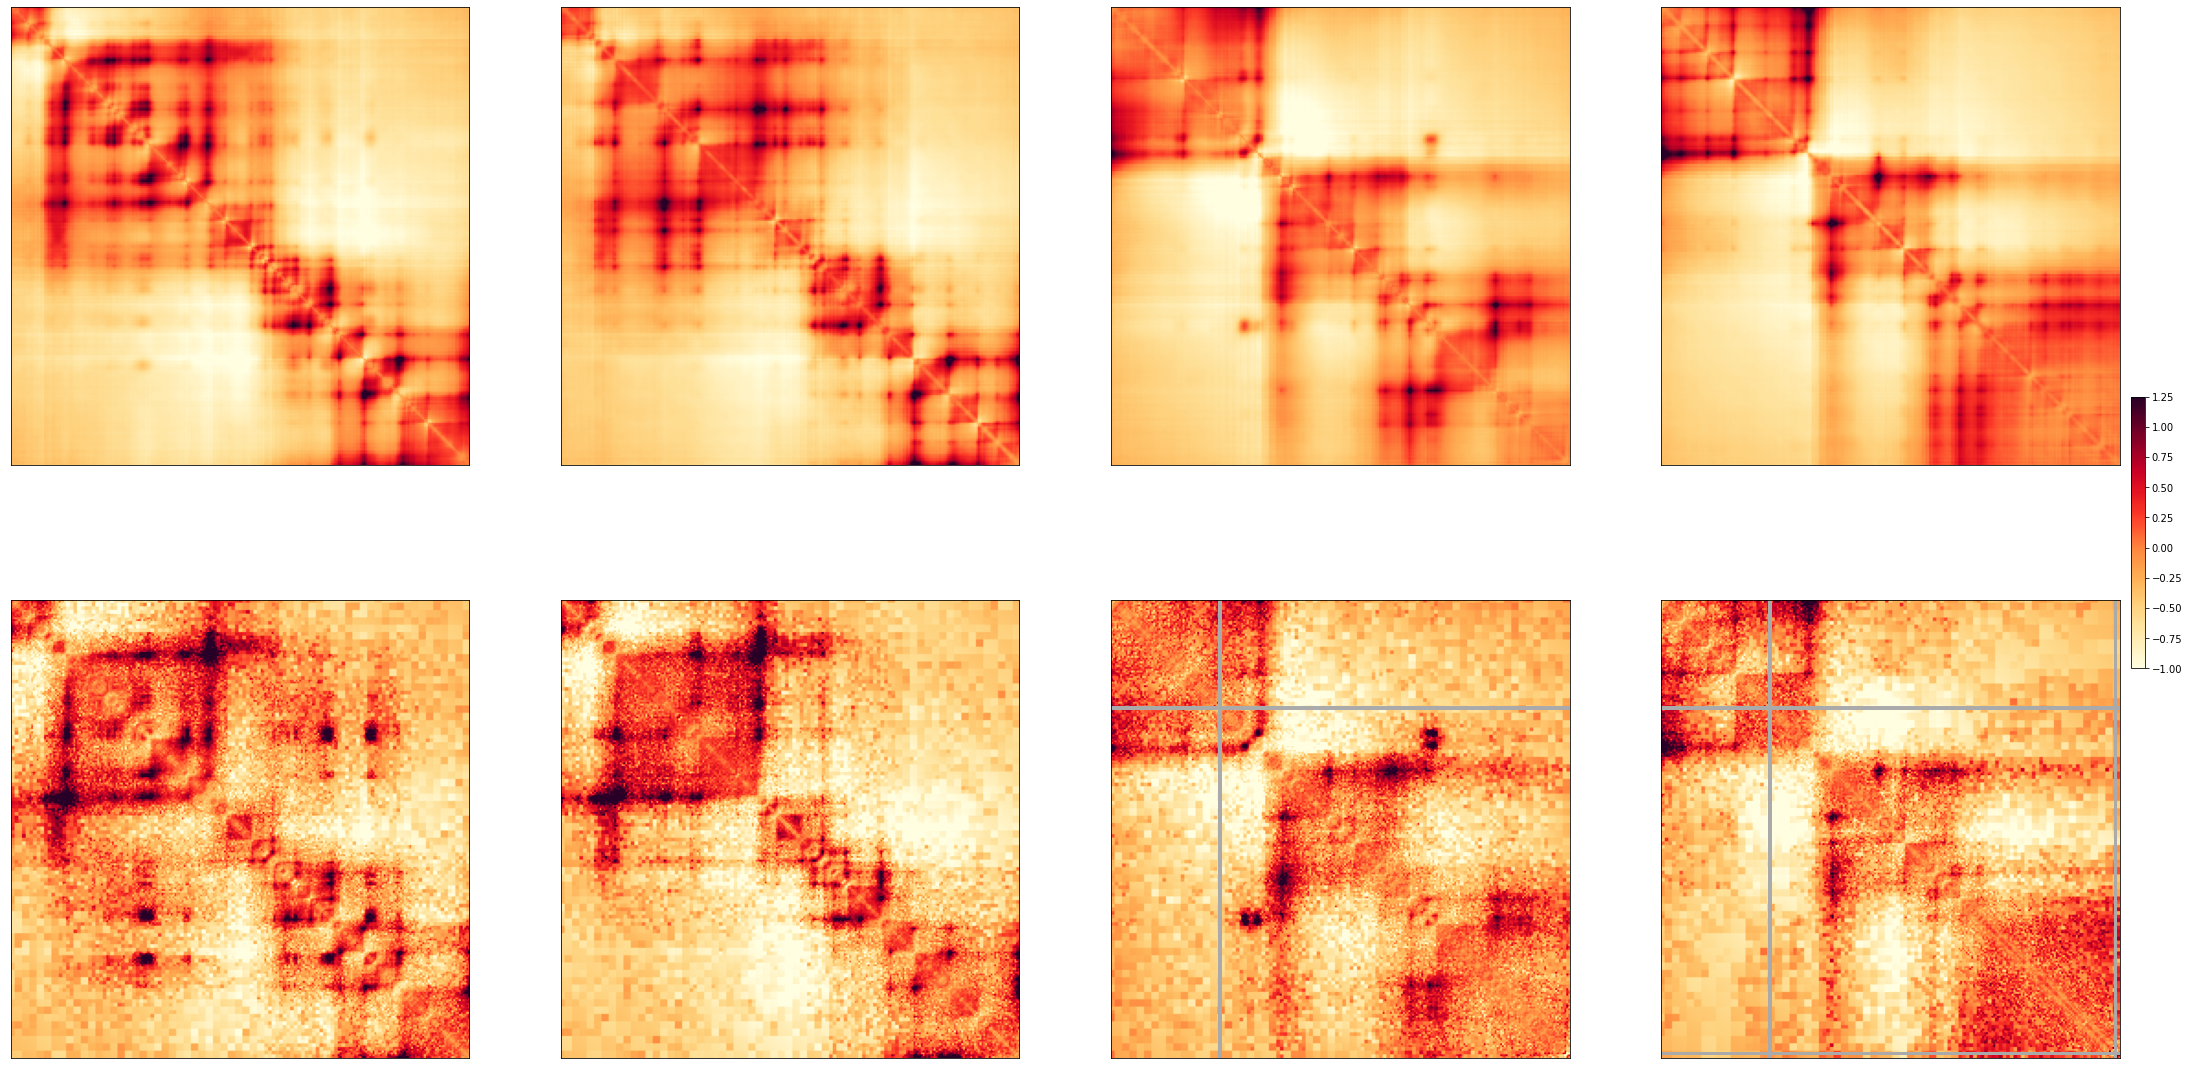

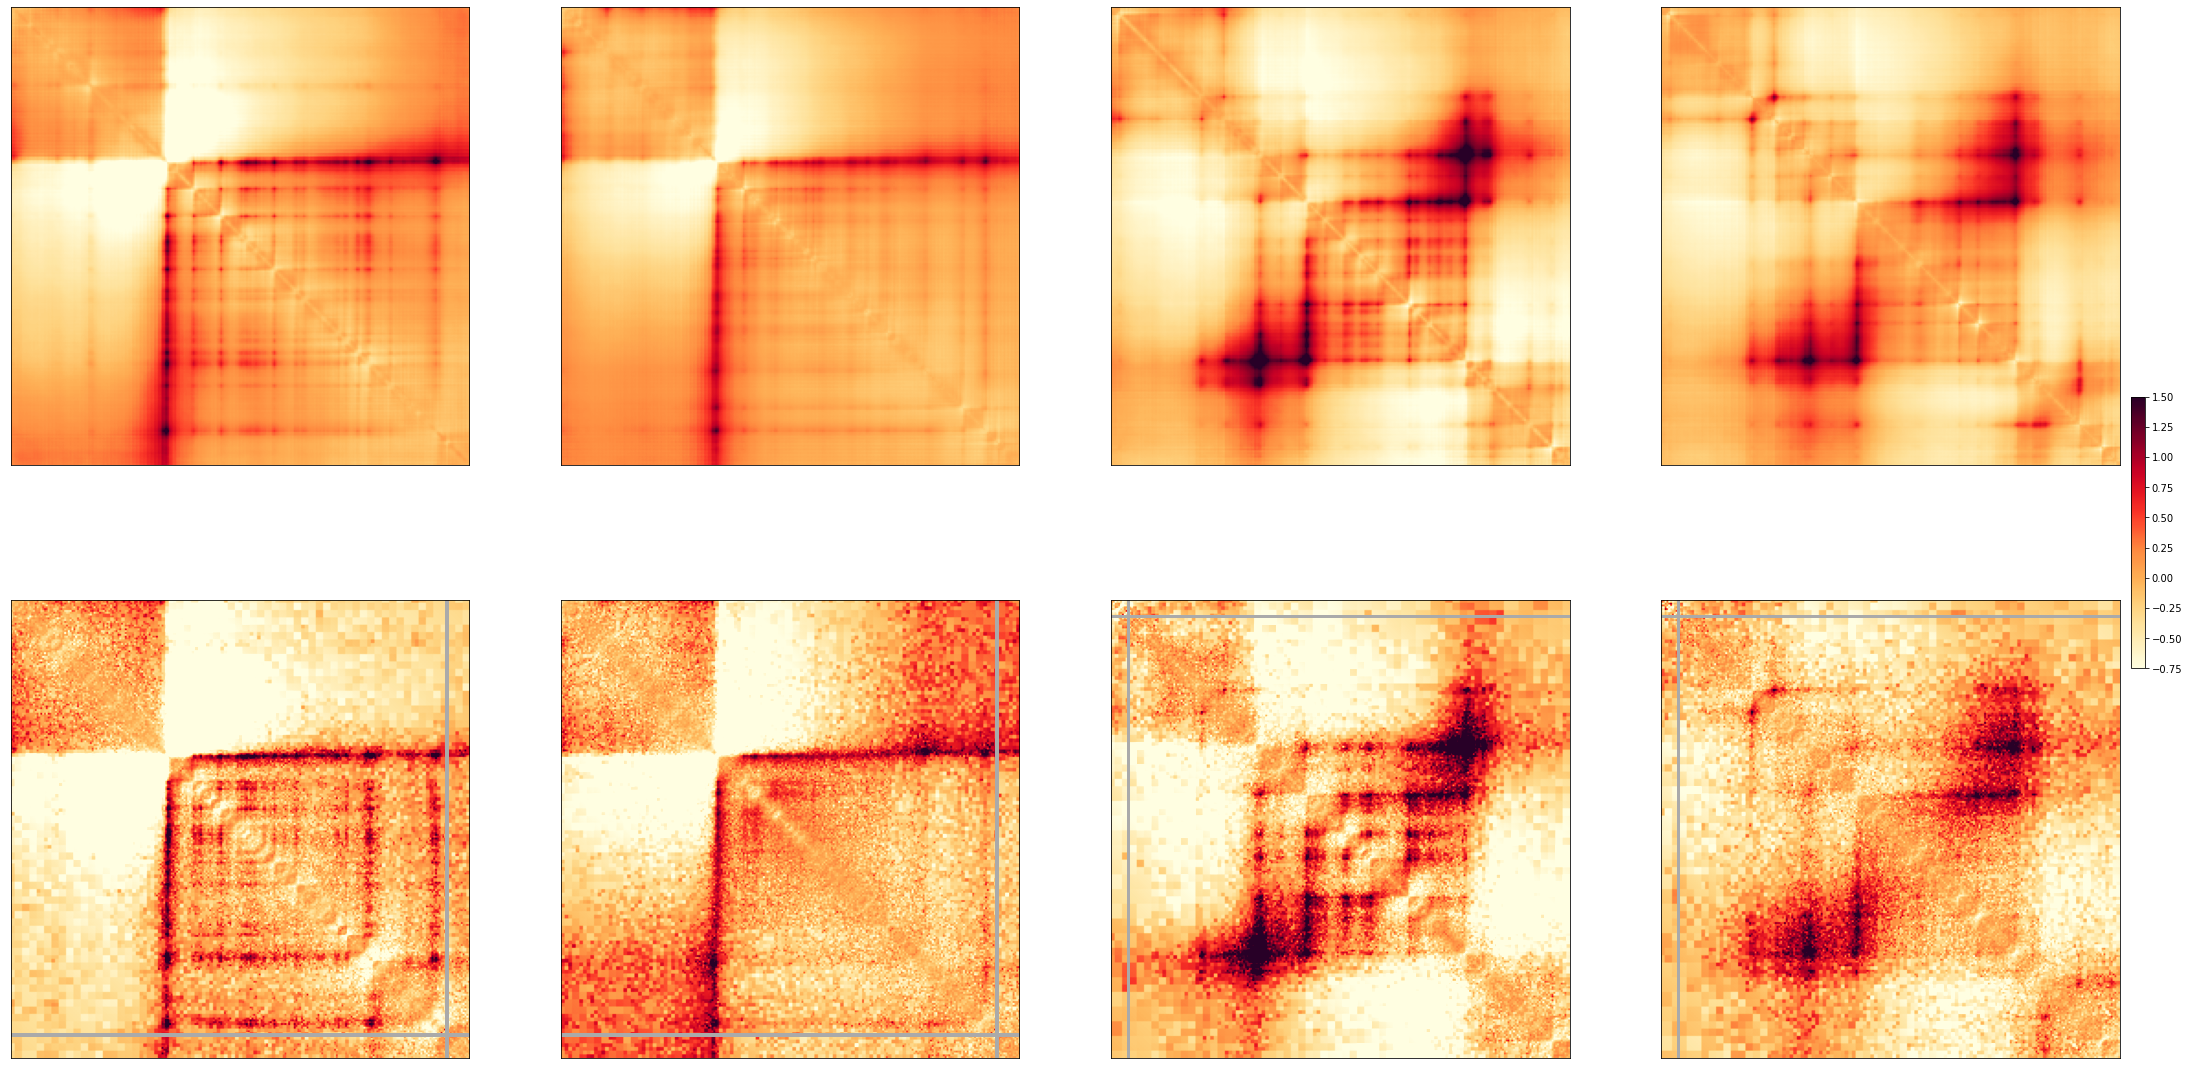

In [5]:
import matplotlib
from matplotlib import pyplot as plt
from colormaps import hnh_cmap_ext5
%matplotlib inline

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig, all_axes = plt.subplots(figsize=(10*4, 10*2 ), nrows=2, ncols=4)
for row_axes in all_axes:
    for ax in row_axes:
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])
        
im=all_axes[0][0].imshow(ps_h1esc[0], cmap=hnh_cmap_ext5, vmin=-1, vmax=1.25)
im=all_axes[1][0].imshow(ts_h1esc[0], cmap=hnh_cmap_ext5, vmin=-1, vmax=1.25)
im=all_axes[0][1].imshow(ps_hff[0], cmap=hnh_cmap_ext5, vmin=-1, vmax=1.25)
im=all_axes[1][1].imshow(ts_hff[0], cmap=hnh_cmap_ext5, vmin=-1, vmax=1.25)

im=all_axes[0][2].imshow(ps_h1esc[1], cmap=hnh_cmap_ext5, vmin=-1, vmax=1.25)
im=all_axes[1][2].imshow(ts_h1esc[1], cmap=hnh_cmap_ext5, vmin=-1, vmax=1.25)
im=all_axes[0][3].imshow(ps_hff[1], cmap=hnh_cmap_ext5, vmin=-1, vmax=1.25)
im=all_axes[1][3].imshow(ts_hff[1], cmap=hnh_cmap_ext5, vmin=-1, vmax=1.25)

fig.colorbar(
        im, ax=all_axes.ravel().tolist(), fraction=0.05, shrink=0.25, pad=0.005
    )
plt.savefig('./figures/prediction.enhancerpolycomb.polycomb.example.pdf')

fig, all_axes = plt.subplots(figsize=(10*4, 10*2 ), nrows=2, ncols=4)
for row_axes in all_axes:
    for ax in row_axes:
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])
im=all_axes[0][0].imshow(ps_hff[2], cmap=hnh_cmap_ext5, vmin=-.75, vmax=1.5)
im=all_axes[1][0].imshow(ts_hff[2], cmap=hnh_cmap_ext5, vmin=-.75, vmax=1.5)
im=all_axes[0][1].imshow(ps_h1esc[2], cmap=hnh_cmap_ext5, vmin=-.75, vmax=1.5)
im=all_axes[1][1].imshow(ts_h1esc[2], cmap=hnh_cmap_ext5, vmin=-.75, vmax=1.5)

im=all_axes[0][2].imshow(ps_hff[3], cmap=hnh_cmap_ext5, vmin=-.75, vmax=1.5)
im=all_axes[1][2].imshow(ts_hff[3], cmap=hnh_cmap_ext5, vmin=-.75, vmax=1.5)
im=all_axes[0][3].imshow(ps_h1esc[3], cmap=hnh_cmap_ext5, vmin=-.75, vmax=1.5)
im=all_axes[1][3].imshow(ts_h1esc[3], cmap=hnh_cmap_ext5, vmin=-.75, vmax=1.5)


fig.colorbar(
        im, ax=all_axes.ravel().tolist(), fraction=0.05, shrink=0.25, pad=0.005
    )
plt.savefig('./figures/prediction.enhancerpolycomb.enhancer.example.pdf')



INFO:pygenometracks.tracksClass:initialize 1. [x-axis]
INFO:pygenometracks.tracksClass:initialize 2. [spacer]
INFO:pygenometracks.tracksClass:initialize 3. [test gtf collapsed]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig file test]
INFO:pygenometracks.tracksClass:initialize 5. [bigwig file test]
INFO:pygenometracks.tracksClass:initialize 6. [spacer]
INFO:pygenometracks.tracksClass:initialize 7. [bigwig file test]
INFO:pygenometracks.tracksClass:initialize 8. [bigwig file test]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:1.8442389965057373
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40.0 x 22.925531914893618. Dpi is set to 300

INFO:pygenometracks.tracksClass:plotting 1. [x-axis]
INFO:pygenometracks.tracksClass:plotting 2. [spacer]
INFO:pygenometracks.tracksClass:plotting 3. [test gtf collapsed]
DEBUG:pygenometracks.tracks.GenomeTrack:ylim 19.479999999999997,-0.08
INFO:pygenometracks.tracksClass:plotting 4. [bigwig fil

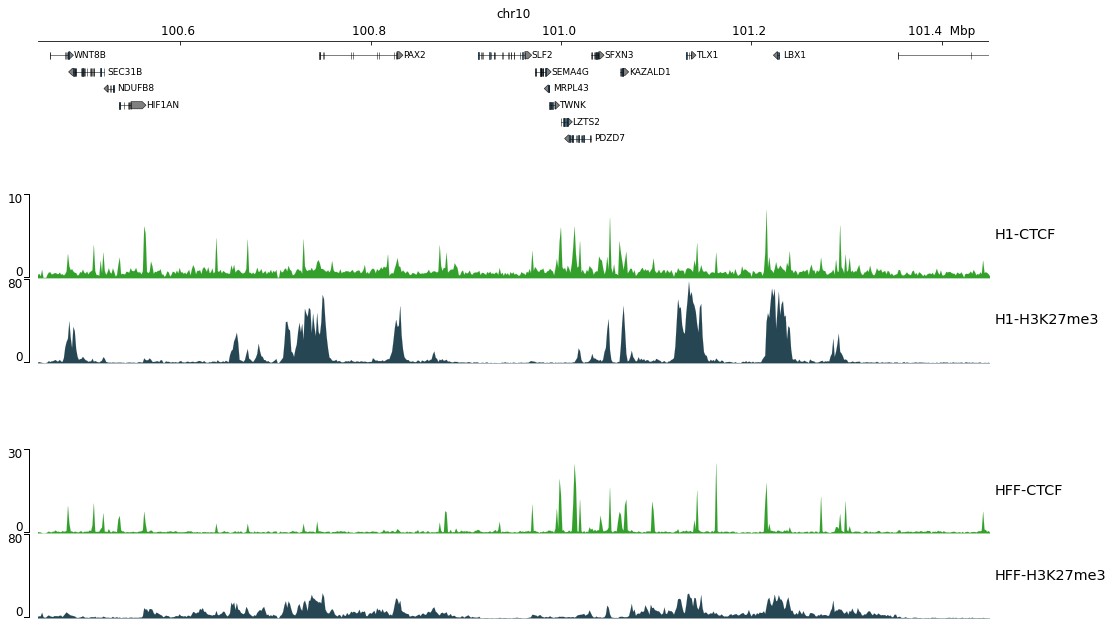

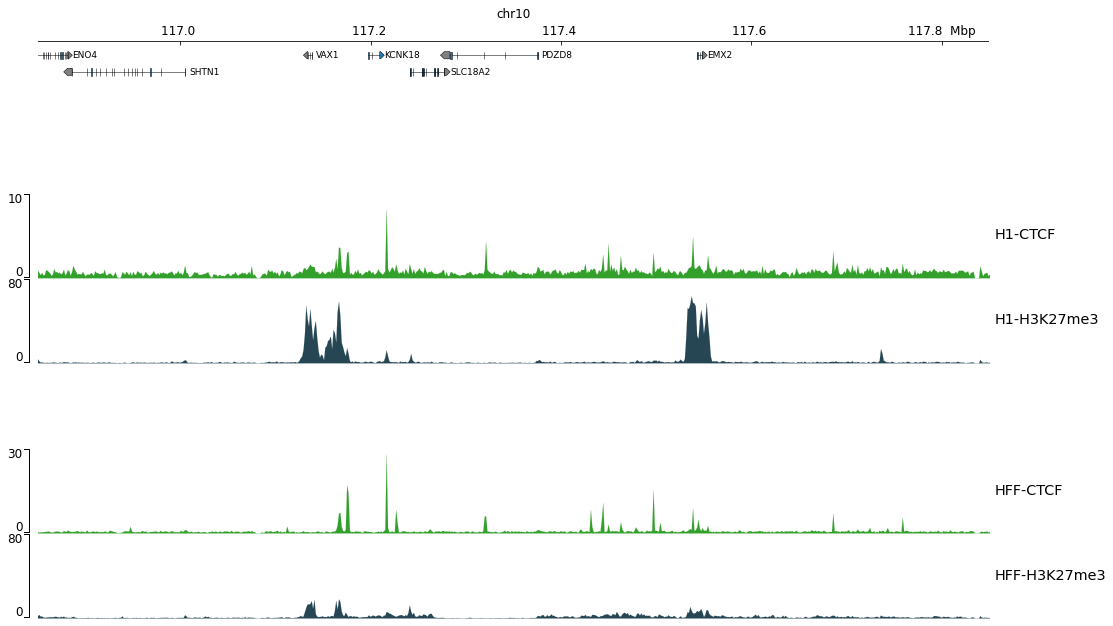


INFO:pygenometracks.tracksClass:initialize 1. [x-axis]
INFO:pygenometracks.tracksClass:initialize 2. [spacer]
INFO:pygenometracks.tracksClass:initialize 3. [test gtf collapsed]
INFO:pygenometracks.tracksClass:initialize 4. [bigwig file test]
INFO:pygenometracks.tracksClass:initialize 5. [bigwig file test]
INFO:pygenometracks.tracksClass:initialize 6. [bigwig file test]
INFO:pygenometracks.tracksClass:initialize 7. [bigwig file test]
INFO:pygenometracks.tracksClass:initialize 8. [spacer]
INFO:pygenometracks.tracksClass:initialize 9. [bigwig file test]
INFO:pygenometracks.tracksClass:initialize 10. [bigwig file test]
INFO:pygenometracks.tracksClass:initialize 11. [bigwig file test]
INFO:pygenometracks.tracksClass:initialize 12. [bigwig file test]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:1.8219199180603027
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40.0 x 35.691489361702125. Dpi is set to 300

INFO:pygenometracks.tracksClass:p

In [6]:
browser_tracks = """
[x-axis]
where = top
fontsize = 12
[spacer]
height = 0.05

[test gtf collapsed]
file = {ORCA_PATH}/resources/hg38.refGeneSelectMANE.bed.gz
height = 5
merge_transcripts = true
prefered_name = gene_name
max_labels = 10000
fontsize = 9
file_type = bed
gene_rows = 8
display = stacked

[bigwig file test]
file = {ORCA_PATH}/extra/H1_CTCF_ENCFF473IZV.bigWig
# height of the track in cm (optional value)
height = 3
title = H1-CTCF
summary_method = mean
file_type = bigwig
max_value = 10
min_value = 0

[bigwig file test]
file = {ORCA_PATH}/extra/H1_H3K27me3_ENCFF912ZUR.bigWig
# height of the track in cm (optional value)
height = 3
title = H1-H3K27me3
summary_method = mean
file_type = bigwig
color = #264653
max_value = 80
min_value = 0

[spacer]
height = 3

[bigwig file test]
file = {ORCA_PATH}/extra/foreskin_fibroblast_CTCF_ENCFF761RHS.bigWig
# height of the track in cm (optional value)
height = 3
title = HFF-CTCF
summary_method = mean
file_type = bigwig
max_value = 30
min_value = 0


[bigwig file test]
file = {ORCA_PATH}/extra/foreskin_fibroblast_H3K27me3_ENCFF027GWJ.bigWig
# height of the track in cm (optional value)
height = 3
title = HFF-H3K27me3
summary_method = mean
file_type = bigwig
color = #264653        
max_value = 80
min_value = 0

""".format(ORCA_PATH=ORCA_PATH)

with open("/dev/shm/temp.ini", "w") as fh:
    fh.write(browser_tracks)


regionstr = (
    'chr10'
    + ":"
    + str(int(100950000-500000))
    + "-"
    + str(100950000+500000)
)

import pygenometracks.plotTracks



args = (
    f"--tracks /dev/shm/temp.ini --region {regionstr} "
    "--trackLabelFraction 0.03 --width 40 --dpi 300 "
    f"--outFileName ./figures/prediction.enhancerpolycomb.anno.SLF2region_polycomb.pdf".split()
)
_ = pygenometracks.plotTracks.main(args)




regionstr = (
    'chr10'
    + ":"
    + str(int(117350000-500000))
    + "-"
    + str(117350000+500000)
)




args = (
    f"--tracks /dev/shm/temp.ini --region {regionstr} "
    "--trackLabelFraction 0.03 --width 40 --dpi 300 "
    f"--outFileName ./figures/prediction.enhancerpolycomb.anno.EMX2VAX1_polycomb.pdf".split()
)
_ = pygenometracks.plotTracks.main(args)


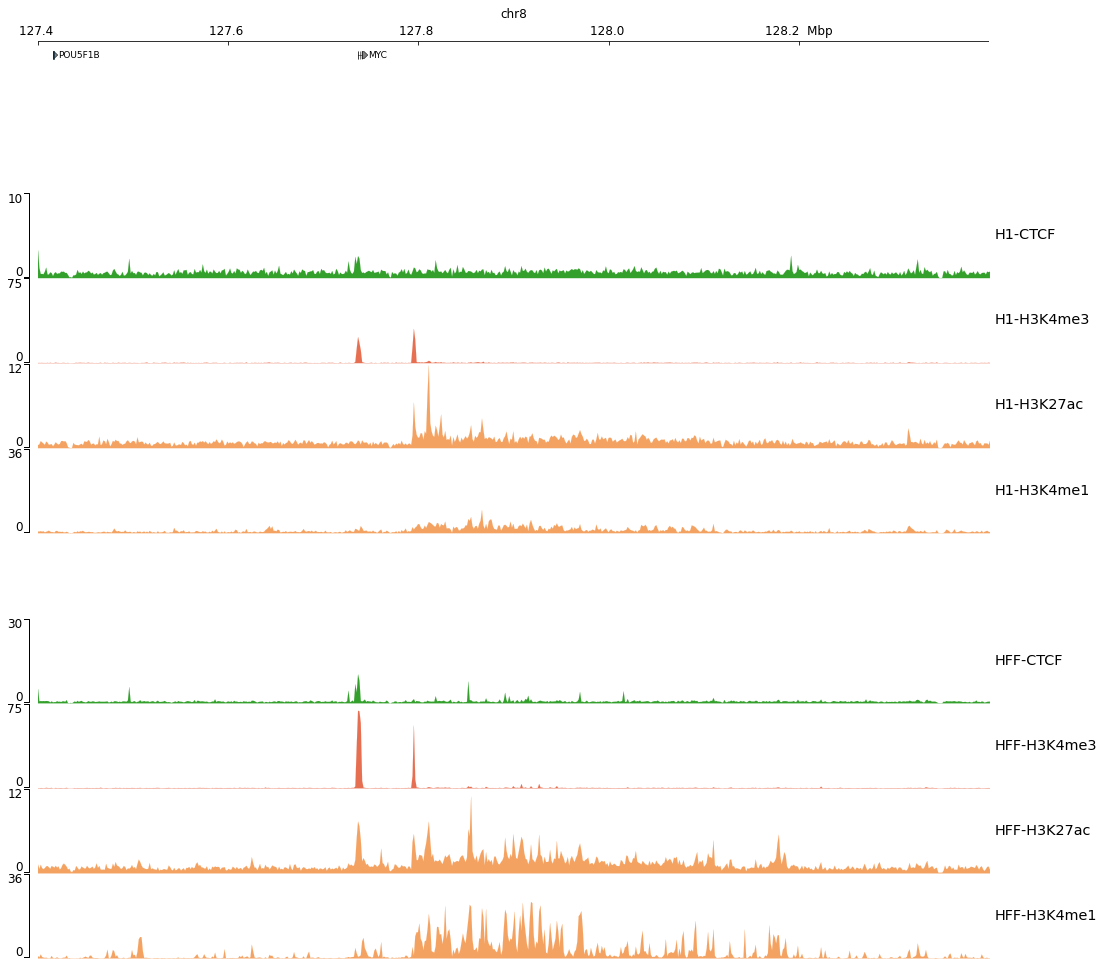

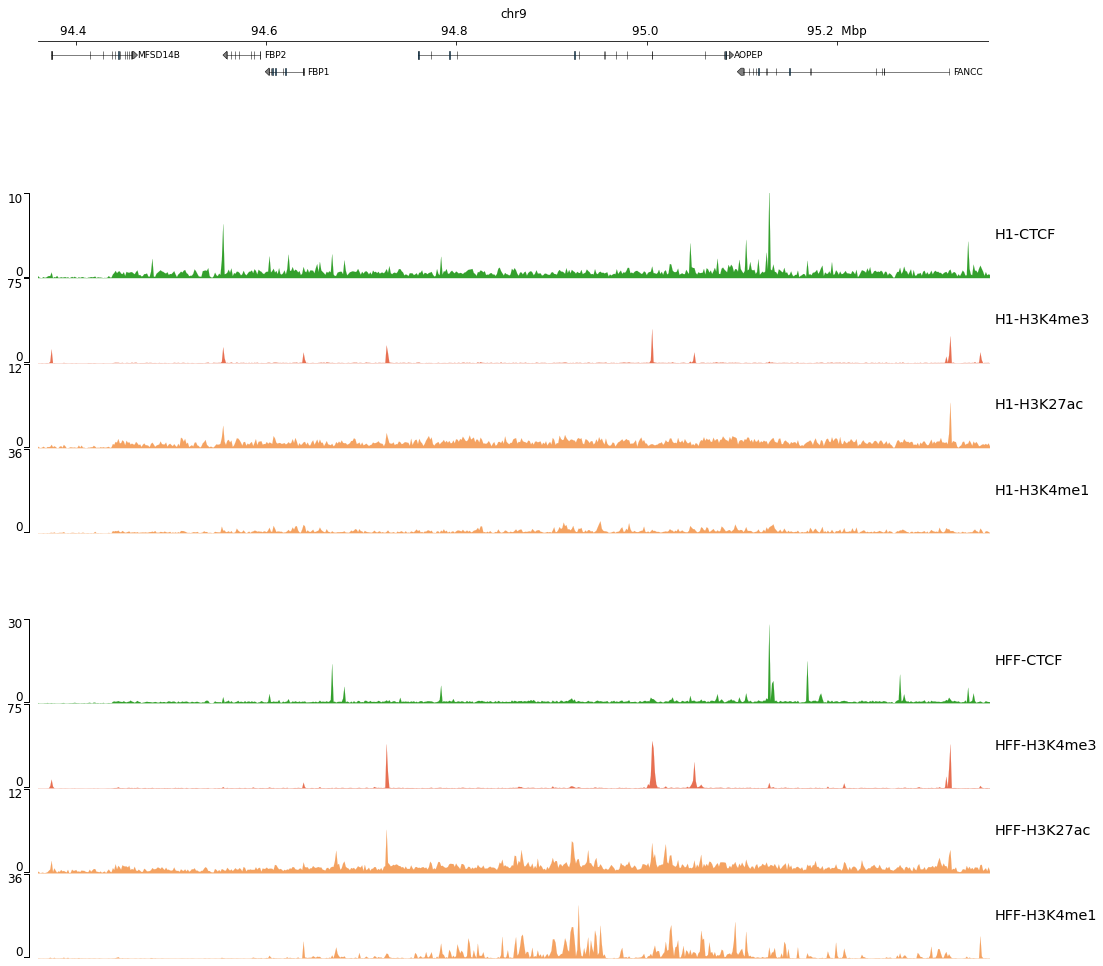

In [7]:
browser_tracks = """
[x-axis]
where = top
fontsize = 12
[spacer]
height = 0.05

[test gtf collapsed]
file = {ORCA_PATH}/resources/hg38.refGeneSelectMANE.bed.gz
height = 5
merge_transcripts = true
prefered_name = gene_name
max_labels = 10000
fontsize = 9
file_type = bed
gene_rows = 8
display = stacked

[bigwig file test]
file = {ORCA_PATH}/extra/H1_CTCF_ENCFF473IZV.bigWig
# height of the track in cm (optional value)
height = 3
title = H1-CTCF
summary_method = mean
file_type = bigwig
max_value = 10
min_value = 0



[bigwig file test]
file = {ORCA_PATH}/extra/H1_H3K4me3_ENCFF623ZAW.bigWig
# height of the track in cm (optional value)
height = 3
title = H1-H3K4me3
summary_method = mean
file_type = bigwig
color = #E76F51
max_value = 75
min_value = 0

[bigwig file test]
file = {ORCA_PATH}/extra/H1_H3K27ac_ENCFF423TVA.bigWig
# height of the track in cm (optional value)
height = 3
title = H1-H3K27ac
summary_method = mean
file_type = bigwig
color = #F4A261
max_value = 12
min_value = 0


[bigwig file test]
file = {ORCA_PATH}/extra/H1_H3K4me1_ENCFF584AVI.bigWig
# height of the track in cm (optional value)
height = 3
title = H1-H3K4me1
summary_method = mean
file_type = bigwig
color = #F4A261
max_value = 36
min_value = 0


[spacer]
height = 3

[bigwig file test]
file = {ORCA_PATH}/extra/foreskin_fibroblast_CTCF_ENCFF761RHS.bigWig
# height of the track in cm (optional value)
height = 3
title = HFF-CTCF
summary_method = mean
file_type = bigwig
max_value = 30
min_value = 0


[bigwig file test]
file = {ORCA_PATH}/extra/foreskin_fibroblast_H3K4me3_ENCFF442WNT.bigWig
# height of the track in cm (optional value)
height = 3
title = HFF-H3K4me3
summary_method = mean
file_type = bigwig
color = #E76F51
max_value = 75
min_value = 0

[bigwig file test]
file = {ORCA_PATH}/extra/foreskin_fibroblast_H3K27ac_ENCFF078JZB.bigWig
# height of the track in cm (optional value)
height = 3
title = HFF-H3K27ac
summary_method = mean
file_type = bigwig
color = #F4A261
max_value = 12
min_value = 0

[bigwig file test]
file = {ORCA_PATH}/extra/foreskin_fibroblast_H3K4me1_ENCFF449DEA.bigWig
# height of the track in cm (optional value)
height = 3
title = HFF-H3K4me1
summary_method = mean
file_type = bigwig
color = #F4A261
max_value = 36
min_value = 0

""".format(ORCA_PATH=ORCA_PATH)

with open("/dev/shm/gbconfig.ini", "w") as fh:
    fh.write(browser_tracks)

regionstr = (
    'chr8'
    + ":"
    + str(int(127900000-500000))
    + "-"
    + str(127900000+500000)
)

import pygenometracks.plotTracks

args = (
    f"--tracks /dev/shm/gbconfig.ini --region {regionstr} "
    "--trackLabelFraction 0.03 --width 40 --dpi 300 "
    f"--outFileName ./figures/prediction.enhancerpolycomb.anno.MYC_enhancer.pdf".split()
)
_ = pygenometracks.plotTracks.main(args)




regionstr = (
    'chr9'
    + ":"
    + str(int(94860000-500000))
    + "-"
    + str(94860000+500000)
)

import pygenometracks.plotTracks
import uuid



args = (
    f"--tracks /dev/shm/gbconfig.ini --region {regionstr} "
    "--trackLabelFraction 0.03 --width 40 --dpi 300 "
    f"--outFileName ./figures/prediction.enhancerpolycomb.anno.chr9_94360000.pdf".split()
)
_ = pygenometracks.plotTracks.main(args)